In [1]:
import copy
import numpy as np
import scipy.stats

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
import matplotlib.transforms as transforms

In [3]:
import analysis_config

In [4]:
import linefinder.config as linefinder_config
import linefinder.analyze_data.worldlines as a_worldlines
import linefinder.analyze_data.worldline_set as a_w_set
import linefinder.analyze_data.plot_worldlines as p_worldlines

/home1/03057/zhafen/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
import linefinder.utils.presentation_constants as p_constants
import linefinder.utils.file_management as file_management

In [6]:
import galaxy_dive.plot_data.plotting as plotting
import galaxy_dive.utils.astro as astro_utils
import galaxy_dive.utils.executable_helpers as exec_helpers
import galaxy_dive.utils.utilities as utilities

# Load Data

In [7]:
snum, galdef = exec_helpers.choose_config_or_commandline(
    [ analysis_config.SNUM, analysis_config.GALDEF ]
)
print( 'Using snum {}, galdef {}'.format( snum, galdef ) )

Using snum 465, galdef _galdefv3


In [8]:
tag_tail = '_CGM_snum{}'.format( snum )

In [9]:
ahf_index = 600

In [10]:
ind = ahf_index - snum

In [11]:
# Load the a helper for loading files easily
file_manager = file_management.FileManager( project='CGM_origin' )

In [12]:
defaults, variations = file_manager.get_linefinder_analysis_defaults_and_variations(
    tag_tail, 
    sim_names = analysis_config.SIM_NAMES,
    galdef = galdef,
)

In [13]:
defaults

{'ahf_index': 600,
 'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m12i_res7100/data',
 'halo_data_dir': '/scratch/03057/zhafen/core/m12i_res7100/halo',
 'ids_tag': 'm12i_CGM_snum465',
 'main_halo_id': 0,
 'ptracks_tag': 'm12i_CGM_snum465',
 'tag': 'm12i_CGM_snum465_galdefv3'}

In [14]:
variations

{'m10q': {'ahf_index': 600,
  'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m10q_res250/data',
  'halo_data_dir': '/scratch/03057/zhafen/core/m10q_res250/halo',
  'ids_tag': 'm10q_CGM_snum465',
  'main_halo_id': 0,
  'ptracks_tag': 'm10q_CGM_snum465',
  'tag': 'm10q_CGM_snum465_galdefv3'},
 'm10v': {'ahf_index': 600,
  'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m10v_res250/data',
  'halo_data_dir': '/scratch/03057/zhafen/core/m10v_res250/halo',
  'ids_tag': 'm10v_CGM_snum465',
  'main_halo_id': 2,
  'ptracks_tag': 'm10v_CGM_snum465',
  'tag': 'm10v_CGM_snum465_galdefv3'},
 'm10y': {'ahf_index': 600,
  'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m10y_res250/data',
  'halo_data_dir': '/scratch/03057/zhafen/core/m10y_res250/halo',
  'ids_tag': 'm10y_CGM_snum465',
  'main_halo_id': 0,
  'ptracks_tag': 'm10y_CGM_snum465',
  'tag': 'm10y_CGM_snum465_galdefv3'},
 'm10z': {'ahf_index': 600,
  'data_dir': '/scratch/03057/zhafen/linefinder_data/core/m10z_res250

In [15]:
w_set = a_w_set.WorldlineSet( defaults, variations )

# Analyze Data

# Plot Metallicity

In [16]:
classification_list = copy.copy( p_constants.CLASSIFICATIONS_CGM_ORIGIN )
classification_list.remove( 'is_CGM_satellite_ISM' )
classification_list.insert( 0, 'is_in_CGM' )

In [17]:
w_set.data_object.retrieve_halo_data()
halo_masses = w_set.data_object.m_vir.inner_item( snum )

In [18]:
# Start from a fresh slate
w_set.data_object.data_masker.clear_masks( True )
# Choose only gas
w_set.data_object.data_masker.mask_data( 'PType', data_value=linefinder_config.PTYPE_GAS )

Dict, {
'm10q' : None,
'm10v' : None,
'm11e_md' : None,
'm10z' : None,
'm11v' : None,
'm11q' : None,
'm10y' : None,
'm12r_md' : None,
'm12f' : None,
'm11i_md' : None,
'm11h_md' : None,
'm12m' : None,
'm11a' : None,
'm12i' : None,
'm11c' : None,
'm11b' : None,
'm12b_md' : None,
'm12z_md' : None,
'm12w_md' : None,
'm11d_md' : None,
'm12c_md' : None,
}

Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting h

/home1/03057/zhafen/repos/galaxy-dive/galaxy_dive/plot_data/generic_plotter.py:231: RuntimeWarning: invalid value encountered in divide
  hist = hist.astype( float ) / ( hist.sum()*(edges[1] - edges[0]) )


Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
Plotting histogram for Z_asplund
File saved at /home1/03057/zhafen/papers/CGM_origin/figures/CGM_metallicity_snum465.pdf


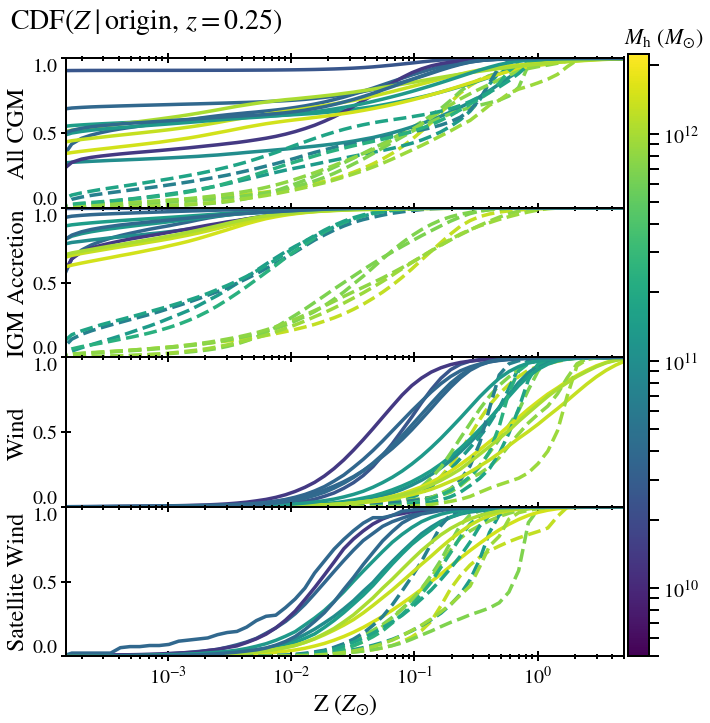

In [19]:
fig = plt.figure( figsize=(10,11), facecolor='white' )
main_ax = plt.gca()

z_min = halo_masses.array().min()/1.5
z_max = halo_masses.array().max()*1.5

gs = matplotlib.gridspec.GridSpec( len( classification_list ), 1, )

gs.update(wspace=0.025, hspace=0.0001)

hists = utilities.SmartDict( {} )
for i, classification in enumerate( classification_list ):
    
    ax = plt.subplot( gs[i,0] )
    
    hists[classification] = utilities.SmartDict( {} )
    
    for sim_name, w_plotter in w_set.items():
        
        if sim_name == 'm10q':
            continue
        
        w = w_plotter.data_object
        w.retrieve_halo_data()
        m_vir = w.m_vir.values[ind]

        z_width = np.log10( z_max ) - np.log10( z_min )
        color_value = ( np.log10( m_vir ) - np.log10( z_min ) )/z_width
        color = cm.viridis( color_value )
        
        if sim_name[-3:] == '_md':
            linestyle = '--'
        else:
            linestyle = '-'

        hists[classification][sim_name], edges = w_plotter.histogram(
            'Z_asplund',
            ax = ax,
            cdf = True,
    #         y_range = [ 0., 1., ],
    #         x_range = [ 0., 10., ],
            x_label = r'Z $(Z_{\odot}$)',
            y_label = p_constants.CLASSIFICATION_LABELS[classification],
            bins = np.logspace( -5, 5., 128 ),
            slices = ind,
            add_plot_label = False,
            color = color,
            x_scale = 'log',
            assert_contains_all_data = False,
            classification = classification,
            histogram_style = 'line',
            linestyle = linestyle,
            return_dist = True,
        )
        
    ax.set_ylim( 0., 1., )
    ax.set_xlim( 1.5e-4, 5., )
    
    # Adjust tick parameters
    ax.tick_params( direction='inout', which='both', top=True, )
    
    # Avoid overlapping ticks
    ax.get_yticklabels()[0].set_verticalalignment( 'bottom' )
    ax.get_yticklabels()[-1].set_verticalalignment( 'top' )
#     ax.set_yticklabels([0., 0.5, 1. ], va='top' )

    # Rotate labels
#     ax.yaxis.label.set_rotation( 'horizontal' )
#     ax.yaxis.label.set_color(
#         p_constants.CLASSIFICATION_COLORS_B[classification]
#     )
#     ax.yaxis.label.set_path_effects(
#         [
#             path_effects.Stroke(
#                 linewidth=2,
#                 foreground=p_constants.CLASSIFICATION_COLORS_B[classification]
# #                 foreground='k',
#             ),
#             path_effects.Normal() 
#         ]
#     )
    
    # Add a label to the y axes
#     if i == 1:
#         ax.annotate(
#             s = 'Cumulative Distribution',
#             xy = ( -0.15, 0.5, ),
#             xycoords = 'axes fraction',
#             fontsize = 22,
#             rotation = 'vertical',
#             verticalalignment = 'center',
#             ha = 'center',
#         )
    if i == 0:
        formatted_redshift = '{:.02g}'.format( w.redshift.values[ind] )

        ax.annotate(
        #                 s = r'$\frac{d(M/M_{\rm tot})}{d(r/r_{\rm vir})}' + r'(z={})$'.format( formatted_redshift ),
            s = r'CDF$( Z \mid$origin, ' + r'$z={})$'.format( formatted_redshift ),
            xy = ( -0.1, 1.2, ),
            xycoords = 'axes fraction',
            fontsize = 28,
            ha = 'left',
        )
    
    # Hide labels
    if i != len( classification_list ) - 1:
        ax.tick_params( labelbottom = False )
    if i == 0:
        ax.tick_params( labeltop = False )

# Add a colorbar
sm = cm.ScalarMappable(
    cmap = cm.viridis,
    norm=colors.LogNorm( z_min, z_max ),
)
sm._A = []
plotting.add_colorbar(
    fig,
    sm,
    method='fig',
    ax_location=[0.905, 0.125, 0.03, 0.76]
)

plt.subplot( gs[0,0] ).annotate(
    s = r'$M_{\rm h}$ $(M_{\odot})$',
    xy = (1., 1.1),
#     xy = (1.15, 0.5),
    xycoords = 'axes fraction',
    fontsize = 22,
)

save_file = 'CGM_metallicity_snum{}.pdf'.format( snum )

plotting.save_fig(
    out_dir = file_manager.get_project_figure_dir(),
    save_file = save_file,
    fig = fig,
)

# Analysis of the Plot

In [20]:
import os
import py2tex.py2tex as py2tex

In [21]:
tex_filepath = os.path.join( file_manager.project_parameters['project_dir'], 'variables.tex' )

In [22]:
tex_file = py2tex.TeXVariableFile( tex_filepath )

In [23]:
# Used for variable names
if snum == 465:
    regime = 'low'
if snum == 172:
    regime = 'high'

## IGM Accretion

In [24]:
class_hists = hists['is_CGM_IGM_accretion']

In [25]:
sub_hists = class_hists.split_by_key_slice( slice(0,3) )

In [26]:
m12s = sub_hists['m12'].split_by_key_slice( slice(-3,100), '_md' )

In [27]:
class_data = w_set.data_object.get_selected_data(
    'Z',
    classification='is_CGM_IGM_accretion',
    sl = slice(None,ind),
)

In [28]:
sub_data = class_data.split_by_key_slice( slice(0,3) )

In [29]:
m12s = sub_data['m12'].split_by_key_slice( slice(-3,100), '_md' )

In [30]:
m12_nep_med = m12s[True].apply( np.median ).array().mean()

In [31]:
tex_file.save_variable(
    'metMWmdNEPmed{}'.format( regime ),
    py2tex.to_tex_scientific_notation( m12_nep_med, 1 ),
)

Saving 4\times10^{-2} as metMWmdNEPmedlow


## Wind

In [32]:
class_hists = hists['is_CGM_wind']

In [33]:
sub_hists = class_hists.split_by_key_slice( slice(0,3) )

In [34]:
m12s = sub_hists['m12'].split_by_key_slice( slice(-3,100), '_md' )

In [35]:
class_data = w_set.data_object.get_selected_data(
    'Z',
    classification='is_CGM_wind',
    sl = slice(None,ind),
)

In [36]:
sub_data = class_data.split_by_key_slice( slice(0,3) )

In [37]:
m12s = sub_data['m12'].split_by_key_slice( slice(-3,100), '_md' )

In [38]:
m12_wind_med = m12s[False].apply( np.median ).array().mean()

In [39]:
tex_file.save_variable(
    'metMWwindmed{}'.format( regime ),
    py2tex.to_tex_scientific_notation( m12_wind_med, 1 ),
)

Saving 4\times10^{-1} as metMWwindmedlow


In [40]:
m11_wind_med = sub_data['m11'].apply( np.median ).array().mean()

In [41]:
tex_file.save_variable(
    'metsubMWwindmed{}'.format( regime ),
    py2tex.to_tex_scientific_notation( m11_wind_med, 1 ),
)

Saving 2\times10^{-1} as metsubMWwindmedlow


In [42]:
m10_wind_med = sub_data['m10'].apply( np.median ).array().mean()

In [43]:
tex_file.save_variable(
    'metdwarfwindmed{}'.format( regime ),
    py2tex.to_tex_scientific_notation( m10_wind_med, 1 ),
)

Saving 3\times10^{-2} as metdwarfwindmedlow


In [44]:
wind_spread = np.log10( m12_wind_med/m10_wind_med )

In [45]:
tex_file.save_variable(
    'metwindspread{}'.format( regime ),
    '{:.01g}'.format( wind_spread ),
)

Saving 1 as metwindspreadlow


In [46]:
m12_iqr = m12s[False].apply( scipy.stats.iqr ).array().mean()

In [47]:
tex_file.save_variable(
    'metMWwindiqr{}'.format( regime ),
    '{:.01g}'.format( m12_iqr ),
)

Saving 1 as metMWwindiqrlow


In [48]:
m12_md_iqr = m12s[True].apply( scipy.stats.iqr ).array().mean()

In [49]:
tex_file.save_variable(
    'metMWmdwindiqr{}'.format( regime ),
    '{:.01g}'.format( m12_md_iqr ),
)

Saving 0.4 as metMWmdwindiqrlow


## Satellite Wind

In [50]:
class_hists = hists['is_CGM_satellite_wind']

In [51]:
sub_hists = class_hists.split_by_key_slice( slice(0,3) )

In [52]:
m12s = sub_hists['m12'].split_by_key_slice( slice(-3,100), '_md' )

In [53]:
class_data = w_set.data_object.get_selected_data(
    'Z',
    classification='is_CGM_satellite_wind',
    sl = slice(None,ind),
)

In [54]:
class_data.remove_empty_items()

In [55]:
sub_data = class_data.split_by_key_slice( slice(0,3) )

In [56]:
m12s = sub_data['m12'].split_by_key_slice( slice(-3,100), '_md' )

In [57]:
m12_wind_med = m12s[False].apply( np.median ).array().mean()

In [58]:
tex_file.save_variable(
    'metMWsatwindmed{}'.format( regime ),
    py2tex.to_tex_scientific_notation( m12_wind_med, 1 ),
)

Saving 6\times10^{-2} as metMWsatwindmedlow


In [59]:
m12_md_wind_med = m12s[True].apply( np.median ).array().mean()

In [60]:
tex_file.save_variable(
    'metMWsatwindboost{}'.format( regime ),
    py2tex.to_tex_scientific_notation( m12_md_wind_med/m12_wind_med, 1 )
)

Saving 3 as metMWsatwindboostlow


In [61]:
m11_wind_med = sub_data['m11'].apply( np.median ).array().mean()
m11_wind_med

0.066606194

In [62]:
tex_file.save_variable(
    'metsubMWsatwindmed{}'.format( regime ),
    py2tex.to_tex_scientific_notation( m11_wind_med, 1 ),
)

Saving 7\times10^{-2} as metsubMWsatwindmedlow


In [63]:
m10_wind_med = sub_data['m10'].apply( np.median ).array().mean()

In [64]:
tex_file.save_variable(
    'metdwarfsatwindmed{}'.format( regime ),
    py2tex.to_tex_scientific_notation( m10_wind_med, 1 ),
)

Saving 10^{-2} as metdwarfsatwindmedlow


In [65]:
wind_spread = np.log10( m12_wind_med/m10_wind_med )

In [66]:
tex_file.save_variable(
    'metsatwindspread{}'.format( regime ),
    '{:.01g}'.format( wind_spread ),
)

Saving 0.6 as metsatwindspreadlow
